<a href="https://colab.research.google.com/github/remy882/ejercicios/blob/main/Copia_de_gatos_perros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
#descagar el set de perros y gatos
datos, metadatos = tfds.load('cats_vs_dogs', as_supervised= True, with_info= True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.NPDS6K_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
metadatos

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, Jo

,image,label
0,,1 (dog)
1,,1 (dog)
2,,1 (dog)
3,,0 (cat)
4,,1 (dog)

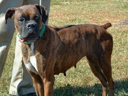
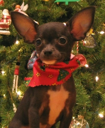
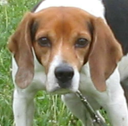
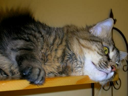
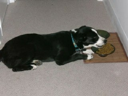

In [ ]:
tfds.as_dataframe(datos['train'].take(5), metadatos)

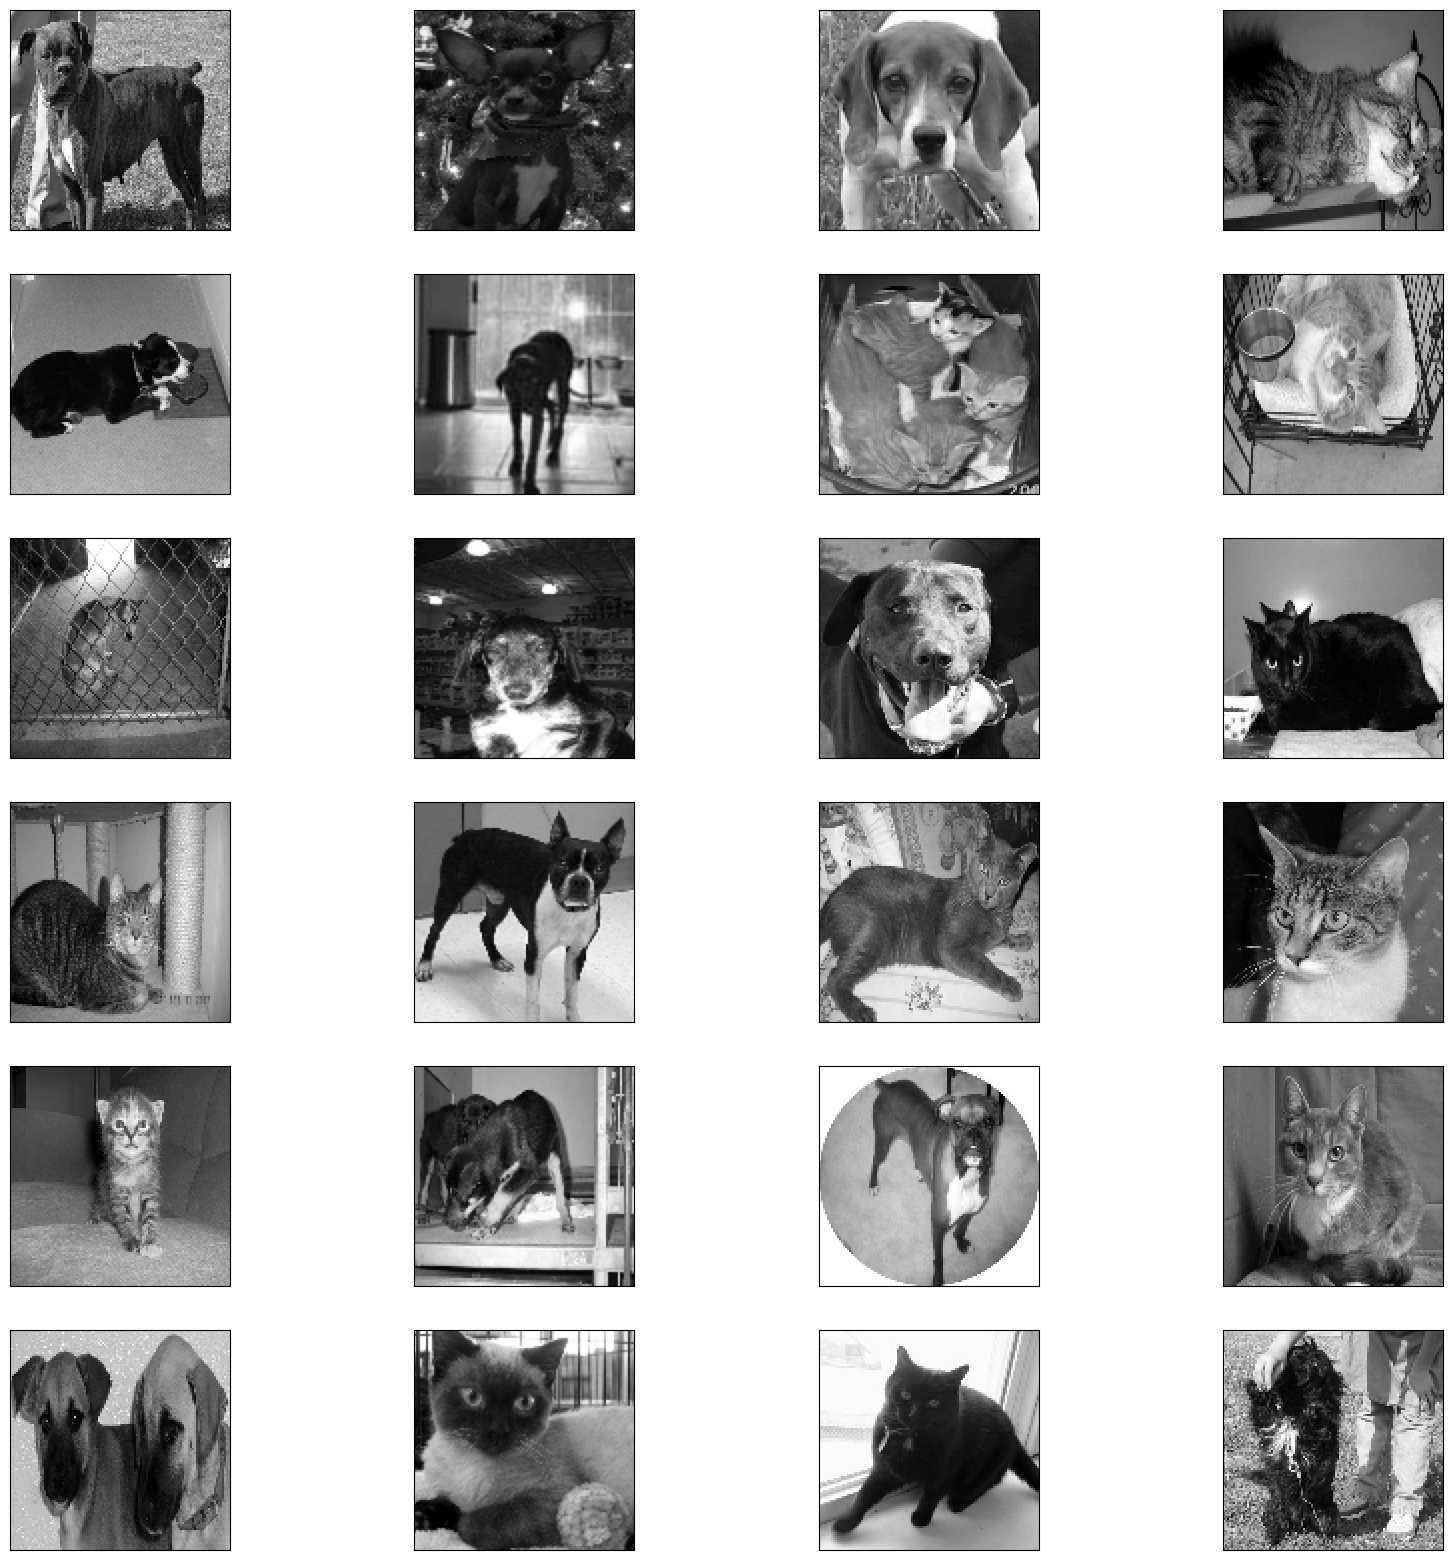

In [ ]:
from re import I
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize=(20, 20))
TAMANO_IMG= 110

for i, (imagen, etiqueta) in enumerate(datos['train'].take(24)):
  imagen =  cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

  plt.subplot(6, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap='gray')

In [ ]:
datos_entrenamiento = []

In [ ]:
for i, (imagen, etiqueta) in enumerate(datos['train']): #todas las imagees
  imagen =  cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen =  imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1)
  datos_entrenamiento.append([imagen, etiqueta])

In [ ]:
len (datos_entrenamiento)

23262

In [ ]:
X = []#entrada de todos los datos
y = [] # perro o miau

for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)



In [ ]:
X

[array([[[251],
         [201],
         [122],
         ...,
         [181],
         [184],
         [136]],
 
        [[240],
         [146],
         [ 89],
         ...,
         [180],
         [151],
         [182]],
 
        [[194],
         [ 93],
         [ 81],
         ...,
         [156],
         [142],
         [176]],
 
        ...,
 
        [[120],
         [166],
         [163],
         ...,
         [145],
         [158],
         [ 94]],
 
        [[133],
         [140],
         [103],
         ...,
         [ 89],
         [195],
         [146]],
 
        [[ 81],
         [125],
         [139],
         ...,
         [ 59],
         [ 55],
         [ 39]]], dtype=uint8),
 array([[[143],
         [134],
         [ 85],
         ...,
         [ 88],
         [ 70],
         [ 84]],
 
        [[148],
         [ 69],
         [ 66],
         ...,
         [129],
         [ 79],
         [124]],
 
        [[ 80],
         [ 72],
         [ 62],
         ...,
      

In [ ]:
import numpy as np
X = np.array(X).astype(float) / 255


In [ ]:
X

array([[[[0.98431373],
         [0.78823529],
         [0.47843137],
         ...,
         [0.70980392],
         [0.72156863],
         [0.53333333]],

        [[0.94117647],
         [0.57254902],
         [0.34901961],
         ...,
         [0.70588235],
         [0.59215686],
         [0.71372549]],

        [[0.76078431],
         [0.36470588],
         [0.31764706],
         ...,
         [0.61176471],
         [0.55686275],
         [0.69019608]],

        ...,

        [[0.47058824],
         [0.65098039],
         [0.63921569],
         ...,
         [0.56862745],
         [0.61960784],
         [0.36862745]],

        [[0.52156863],
         [0.54901961],
         [0.40392157],
         ...,
         [0.34901961],
         [0.76470588],
         [0.57254902]],

        [[0.31764706],
         [0.49019608],
         [0.54509804],
         ...,
         [0.23137255],
         [0.21568627],
         [0.15294118]]],


       [[[0.56078431],
         [0.5254902 ],
         [0.33

In [ ]:
y = np.array(y)

In [ ]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
modeloDenso = tf.keras.models. Sequential([
  tf.keras.layers. Flatten(input_shape=(110, 110, 1)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers. Dense(1, activation='sigmoid' )
])

modeloCNN = tf.keras.models. Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(110, 110,1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN2 = tf.keras.models. Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(110, 110,1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers. Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')

])

In [ ]:
modeloDenso.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy' ])

modeloCNN.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy' ])

modeloCNN2.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy' ])

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
tensorboardDenso = TensorBoard(log_dir='logs/denso' )
modeloDenso.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardDenso])

Epoch 1/100
618/618 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.5348 - loss: 0.8030 - val_accuracy: 0.6040 - val_loss: 0.6733
Epoch 2/100
618/618 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5635 - loss: 0.6851 - val_accuracy: 0.5788 - val_loss: 0.6746
Epoch 3/100
618/618 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5881 - loss: 0.6711 - val_accuracy: 0.5903 - val_loss: 0.6742
Epoch 4/100
618/618 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5876 - loss: 0.6695 - val_accuracy: 0.5794 - val_loss: 0.6768
Epoch 5/100
618/618 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5850 - loss: 0.6674 - val_accuracy: 0.5777 - val_loss: 0.6791
Epoch 6/100
618/618 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5963 - loss: 0.6656 - val_accuracy: 0.5768 - val_loss: 0.6850
Epoch 7/100
618/618 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5981 - loss: 0.6647 - val_accuracy: 0.5977 - val_loss: 0.6650
Epoch 8/100
618/618 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6093 - loss: 0.6565 - val_acc

In [ ]:
  %load_ext tensorboard

In [ ]:
%tensorboard -- logdir logs